In [1]:
import numpy as np
from matplotlib import pyplot as plt
import random
import copy
import scipy.spatial.distance as sci
import sys, time
import seaborn as sns
from random import randrange
import pandas as pd

In [2]:
def HC(x):
    sum = 0.0
    for i in range(1, len(x) + 1):
        sum += ((10 ** 6) ** ((i - 1) / (len(x) - 1))) * x[i - 1] ** 2
    return sum

def SHC(x, o):
    F_1 = 100
    return HC((x - o).T) + F_1

In [3]:
#FUNCTIONS AND THEIR DEFINATIONS i.e.(STEPS)
def GENERATE_GROUPS(n_population, sex_rate, pride_num, nomad_percentage, UPPER_LIMIT, LOWER_LIMIT, dimensions, eval, o): 

    nomad_population = int(round(n_population * nomad_percentage, 0)) 
    pride_population = n_population - nomad_population                    

    male_nomad_indices = []
    for i in range (nomad_population):
        male_nomad_indices.append(0)
    male_nomad_indices = np.asarray(male_nomad_indices)

    male_pride_indices = []
    for i in range (pride_population):
        male_pride_indices.append(0)
    male_pride_indices = np.asarray(male_pride_indices)

    X = pride_population * (1 - sex_rate)
    Y = nomad_population * sex_rate

    PrideMalesNum = int(round(X, 0))
    NomadMalesNum = int(round(Y, 0))

    for i in range(PrideMalesNum):
        male_pride_indices[i] = 1
    random.shuffle(male_pride_indices)

    for i in range(NomadMalesNum):
        male_nomad_indices[i] = 1
    random.shuffle(male_nomad_indices)
  
    NomadLionsArr = []
    PrideLionsArr = []

    for i in range(nomad_population):
        NomadLionsArr.append(Lion())
    NomadLionsArr = np.asarray(NomadLionsArr)

    for i in range(pride_population):
        PrideLionsArr.append(Lion())
    PrideLionsArr = np.asarray(PrideLionsArr)


    for i in range(nomad_population):
        NomadLionsArr[i].evaluation = eval
        NomadLionsArr[i].isMature = True
        NomadLionsArr[i].o = o
        NomadLionsArr[i].isNomad = True

        # SETTING THE SEX 
        if male_nomad_indices[i] == 1:
            NomadLionsArr[i].isMale = True
        else:
            NomadLionsArr[i].isMale = False

        # INITILIZATION OF LIONS POSITIONS i.e. X & bestVisitedPosition
        NOMAD_POSITION = np.random.uniform(LOWER_LIMIT, UPPER_LIMIT, (1, dimensions))
        NomadLionsArr[i].x = NomadLionsArr[i].bestVisitedPosition = NOMAD_POSITION

    # AS THERE ARE CERTIAN NUMBER OF PRIDES SO MAKING PRIDES OBJECT WHICH WILL HOLD PRIDE LION's PRIDE INFORMATION
    prideArray = []
    for i in range(pride_num):
        prideArray.append(Group())
    prideArray = np.asarray(prideArray)

    j = 0
    for i in range(pride_population):

        PrideLionsArr[i].isNomad = False
        PrideLionsArr[i].evaluation = eval
        PrideLionsArr[i].o = o
        PrideLionsArr[i].isMature = True

        # SETTING THE SEX 
        if male_pride_indices[i] > 0:
            if male_pride_indices[i] < 2:
                PrideLionsArr[i].isMale = True

            # IF THE CURRENT LION IS MALE THEN CHECK TO STORE @ LION IN EACH PRIDE
            p_num = 2 * pride_num
            if j in range(p_num):
                prideIndex = j % 4
                j += 1
        else:
            PrideLionsArr[i].isMale = False

        # INITILIZATION OF LIONS POSITIONS i.e. X & bestVisitedPosition
        PRIDE_POSITION = np.random.uniform(LOWER_LIMIT, UPPER_LIMIT, (1, dimensions))
        PrideLionsArr[i].x = PrideLionsArr[i].bestVisitedPosition = PRIDE_POSITION

        if j not in range(2 * pride_num) or male_pride_indices[i] != 1:
            prideIndex = np.random.randint(0, pride_num)
        prideArray[prideIndex].lionArray = np.append(prideArray[prideIndex].lionArray, PrideLionsArr[i])

    #NOW RETURNING THE PRIDE AND NOMAND ARRAYS 
    return prideArray, NomadLionsArr

In [4]:
def HUNTING(prideArr, UPPER_LIMIT, LOWER_LIMIT):
    for pride in prideArr:
        # THE BELOW LOOP IS USED TO ASSIGN A LION TO A HUNTING GROUP
        for lion in pride.lionArray:

            if lion.isMale == False:
                lion.huntingGroup = randrange(0, 4)
            elif lion.isMale == True:
                lion.huntingGroup = 0

        fitness_of_huntingGroup1 = 0
        fitness_of_huntingGroup2 = 0
        fitness_of_huntingGroup3 = 0
#1
        for lion in pride.lionArray:
            if lion.huntingGroup == 1:
                fitness_of_huntingGroup1 += lion.getCurrentPositionScore()
#2
        for lion in pride.lionArray:
            if lion.huntingGroup == 2:
                fitness_of_huntingGroup2 += lion.getCurrentPositionScore()
#3
        for lion in pride.lionArray:
            if lion.huntingGroup == 3:
                fitness_of_huntingGroup3 += lion.getCurrentPositionScore()


        FITNESS_VALS = [fitness_of_huntingGroup1, fitness_of_huntingGroup2, fitness_of_huntingGroup3]
        FITNESS_VALS.sort()

        # SORTING THE HUNTING GROUPS BASED ON THEIR FITNESS 
        centre = FITNESS_VALS[-1]
        right = FITNESS_VALS[-2]
        left = FITNESS_VALS[-3]
#         print(f"HUNTING C>R,L {centre} , {right} , {left}")
    return prideArr

In [5]:
def move_to_safety(prideArr, UPPER_LIMIT, LOWER_LIMIT, dimensions):
    #TODO:
    return prideArr

In [6]:
def lionsRoam(prideArr, NomadLionsArr, roaming_percentage, UPPER_LIMIT, LOWER_LIMIT, dimesions):

    for pride in prideArr:
        for lion in pride.lionArray:
            if lion.isMale != False:

                BVP = lion.bestVisitedPosition
                BVPS = lion.getBestVisitedPositionScore()
                CPS = lion.getCurrentPositionScore()

                territory = [(BVP, BVPS) for lion in pride.lionArray]

                # NOW FROM TERITORY SELECTING THE ROAMING PERCENT OF TERITORY

                territory_roaming_percentage = int(round(len(territory) * roaming_percentage))
                selected = random.sample(territory, territory_roaming_percentage)

                for place in selected:
                    neg_angle = -np.pi/6
                    pos_angle = np.pi/6

                    angle = np.random.uniform(neg_angle, pos_angle)

                    distance = 1
            
                    step = np.random.uniform(0, 0.2)

                    tan_angle = np.tan(angle)
                    position = place[0] - lion.x
                    l_position = step * position * tan_angle

                    lion.x += l_position

                    if CPS < BVPS:
                        lion.bestVisitedPosition = lion.x

    return prideArr, NomadLionsArr

In [7]:
def lionsMating(prideArr, NomadLionsArr, mating_prob, mutation_prob, LOWER_LIMIT, UPPER_LIMIT, o): #RENAME TO MATING
    for pride in prideArr:
        for lion in pride.lionArray:
            ar_no = np.random.random_sample()
            males = []
            if (lion.isMale == False) and (ar_no < mating_prob):
                for lion in pride.lionArray:
                    if lion.isMale != False:
                        males.append(lion)
                
                if (len(males) == 0):
                    numberMates = 0
                elif (len(males) >0 and len(males) <2):
                    numberMates = randrange(1, 2)
                else:
                    numberMates = randrange(1, 3)

                MALE_MATES = np.random.choice(males, numberMates)
                selcted_maless = np.array([m.x for m in MALE_MATES])
                                
                cub_1, cub_2 = matingOperator(lion.x, selcted_maless, mutation_prob, LOWER_LIMIT, UPPER_LIMIT)
            
                cub_1.isNomad = False
                cub_2.isNomad = False
                cub_1.isMature = True
                cub_2.isMature = True
                cub_1.evaluation = lion.evaluation
                cub_2.evaluation = lion.evaluation
                cub_1.o = o
                cub_2.o = o


                pride.lionArray = np.append(pride.lionArray, cub_1)
                pride.lionArray = np.append(pride.lionArray, cub_2)
    #Mating in case of nomad lions            
    for lion in NomadLionsArr:
        ar_no1 = np.random.random_sample()
        males1 = [] 
        if (lion.isMale == False) and (ar_no1 < mating_prob):            
            for lion in NomadLionsArr:
                if lion.isMale != False:
                    males.append(lion)
            maleMate = random.sample(males,1)[0]
            ssMales = np.array([maleMate.x])

            cub_1, cub_2 = matingOperator(lion.x, ssMales, mutation_prob, LOWER_LIMIT, UPPER_LIMIT)
            
            cub_1.evaluation = lion.evaluation
            cub_2.evaluation = lion.evaluation
            cub_1.isMature = True
            cub_2.isMature = True
            cub_1.o = o
            cub_2.o = o
            cub_1.isNomad = True
            cub_2.isNomad = True

            NomadLionsArr = np.append(NomadLionsArr, cub_1)
            NomadLionsArr = np.append(NomadLionsArr, cub_2)

    return prideArr, NomadLionsArr

In [8]:
def matingOperator(female_pos, males_array, mutation_prob, LOWER_LIMIT, UPPER_LIMIT):

    beta = np.random.normal(0.5, 0.1)
    maleNo = len(males_array)

    malePositionSum = []
    for i in range (len(female_pos)):
        malePositionSum.append(0)
    malePositionSum = np.asarray(malePositionSum)
    
    
    for malePos in males_array:
        malePositionSum = np.add(malePositionSum, malePos)

    malePositionAve = malePositionSum / maleNo

    ff1 = female_pos * beta
    mm1 = malePositionAve * (1 - beta) 
    ff2 = (1 - beta) * female_pos
    mm2 = malePositionAve * beta
    offspringVec1 = (ff1) + (mm1)
    offspringVec2 = (ff1) + (mm2)

    for basis in range(len(offspringVec1)):
        ar_no11 = np.random.random_sample()
        ar_no22 = np.random.random_sample()

        if ar_no11 < mutation_prob:
            offspringVec1[basis] = ((UPPER_LIMIT - LOWER_LIMIT) * np.random.random_sample() + LOWER_LIMIT)
        if ar_no22 < mutation_prob:
            offspringVec2[basis] = ((UPPER_LIMIT - LOWER_LIMIT) * np.random.random_sample() + LOWER_LIMIT)

    cub_1 = Lion()
    cub_1.x = offspringVec1
    cub_1.isMale = (beta >= 0.5)
    cub_1.bestVisitedPosition = offspringVec1
    cub_1.isMature = False

    cub_2 = Lion()
    cub_2.x = offspringVec2
    cub_2.isMale = not(cub_1.isMale) 
    cub_2.bestVisitedPosition = offspringVec2
    cub_2.isMature = False


    return cub_1, cub_2

In [9]:
def MIGRATE_FEMALE_FROM_PRIDE(prideArr, NomadLionArr, migration_rate, sex_rate, n_population, pride_number, nomad_percentage):

    # MAXIMUM NUMBER OF FEMALES CAN BE
    a = 1 / pride_number
    b = sex_rate * a
    c = (1 - nomad_percentage) * b
    d = n_population * c
    maxFemaleNo = np.ceil(d)

    return prideArr, NomadLionArr

In [10]:
def lionsAttackDefense(prideArray, nomadLionsArray, sexRate, nPop, percentNomad, prideNo):
    maxMalePrideNo = 2 # because there is a check that atlest 2 lions should be ina pride
    for pride in prideArray:
        prideFemales=[]
        newlyGenNomads = []
        prideMales=[]
        for lion in pride.lionArray:
            if lion.isMale == False:
                prideFemales.append(lion)

        for lion in pride.lionArray:
            if lion.isMale == True:
                prideMales.append(lion)
                
        prideMales = sorted(prideMales, key=lambda lion: lion.getBestVisitedPositionScore()[0], reverse=False)

        while len(prideMales)>maxMalePrideNo:
            temp_l = prideMales[-1]
            del prideMales[-1]
            newlyGenNomads = np. append(newlyGenNomads,temp_l)
            
        remainingPrideLions = np.concatenate((prideFemales, prideMales))
        pride.lionArray = remainingPrideLions
        
        nomadLionsArray = np.append(nomadLionsArray, newlyGenNomads)                    
    return prideArray, nomadLionsArray

In [11]:
def GET_CURRENT_BEST(prideArr, NomadLionArr):
    scores = np.array([])
    for pride in prideArr:
        for lion in pride.lionArray:
            scores = np.append(scores, lion.getBestVisitedPositionScore())

    for lion in NomadLionArr:
            scores = np.append(scores, lion.getBestVisitedPositionScore())

    return np.min(scores)

In [12]:
# mal_Nomads = []
# fem_Nomads = []
# for lion in nomadLionsArray:
#     if lion.isMale != False:
#         mal_Nomads.append(lion)
        
# for lion in nomadLionsArray:
#     if lion.isMale != True:
#         fem_Nomads.append(lion)
        
# mal_Nomads = sorted(maleNomads, key=lambda lion: lion.getCurrentPositionScore()[0], reverse=False)
# fem_Nomads = sorted(femaleNomads, key=lambda lion: lion.getCurrentPositionScore()[0], reverse=False)

#     maleNomads = [lion for lion in nomadLionsArray if lion.isMale == True]
#     maleNomads = sorted(maleNomads, key=lambda lion: lion.getCurrentPositionScore()[0], reverse=False)

#     femaleNomads = [lion for lion in nomadLionsArray if lion.isMale == False]
#     femaleNomads = sorted(femaleNomads, key=lambda lion: lion.getCurrentPositionScore()[0], reverse=False)
        

In [13]:
def STEP6(prideArray, nomadLionsArray, nPop, sexRate, percentNomad, prideNo):
    

    # MAKING LIST OF MALE AND FEMALE LIONS AND SORTING THEM 
    mal_Nomads = []
    fem_Nomads = []
    for lion in nomadLionsArray:
        if lion.isMale != False:
            mal_Nomads.append(lion)

    for lion in nomadLionsArray:
        if lion.isMale != True:
            fem_Nomads.append(lion)

    mal_Nomads = sorted(mal_Nomads, key=lambda lion: lion.getCurrentPositionScore()[0], reverse=False)
    fem_Nomads = sorted(fem_Nomads, key=lambda lion: lion.getCurrentPositionScore()[0], reverse=False)

    
    maxMaleNomadNo = sexRate
    maxMaleNomadNo = maxMaleNomadNo * percentNomad
    maxMaleNomadNo = maxMaleNomadNo * nPop
    
    maxFemaleNomadNo = (1 - sexRate)
    maxFemaleNomadNo = maxFemaleNomadNo * percentNomad
    maxFemaleNomadNo = maxFemaleNomadNo * nPop
    
    while len(mal_Nomads) > maxMaleNomadNo:
        del mal_Nomads[-1]

    while len(fem_Nomads) > maxFemaleNomadNo:
        del fem_Nomads[-1]

    remainingNomadLions = np.concatenate((fem_Nomads, mal_Nomads))
    return prideArray, remainingNomadLions

In [14]:
def updateBestScoreList(prideArray, nomadLionsArray):
    for pride in prideArray:
        for lion in pride.lionArray:
            lion.bestScoreHistory.append(lion.getBestVisitedPositionScore())

    for lion in nomadLionsArray:
        lion.bestScoreHistory.append(lion.getBestVisitedPositionScore())

    return prideArray, nomadLionsArray

In [15]:
# THIS CLASS IS FOR REPRESENTEING THE PRIDE
class Group:

    def __init__(self):

        self.lionArray = np.array([])
        self.migratedFemaleNo = 0

# THE LION CLASS IS USED TO KEEP THE INFORMATION OF EACH LION OF THE ENTIRE POPULATION 
class Lion:

    def __init__(self):

        self.isMale = None
        self.evaluation = None
        self.bestVisitedPosition = None
        self.isMature = None
        self.isNomad = None
        self.x = None
        self.huntingGroup = None
        self.bestScoreHistory = [np.Infinity]
        self.o = None

    def getBestVisitedPositionScore(self):
        return self.evaluation(self.bestVisitedPosition, self.o)

    def getCurrentPositionScore(self):
        return self.evaluation(self.x, self.o)

IMPROVED SCORE: 2.61E+09
IMPROVED SCORE: 2.21E+09
Program Completion => 20.0% Time taken for this run is 0.05083155632019043 seconds
IMPROVED SCORE: 2.97E+09
IMPROVED SCORE: 2.71E+09
Program Completion => 40.0% Time taken for this run is 0.054851531982421875 seconds
IMPROVED SCORE: 2.39E+09
Program Completion => 60.0% Time taken for this run is 0.051164865493774414 seconds
IMPROVED SCORE: 1.43E+09
IMPROVED SCORE: 1.35E+09
Program Completion => 80.0% Time taken for this run is 0.04484295845031738 seconds
IMPROVED SCORE: 1.92E+09
IMPROVED SCORE: 1.77E+09
IMPROVED SCORE: 1.51E+09
Program Completion => 100.0% Time taken for this run is 0.043915510177612305 seconds


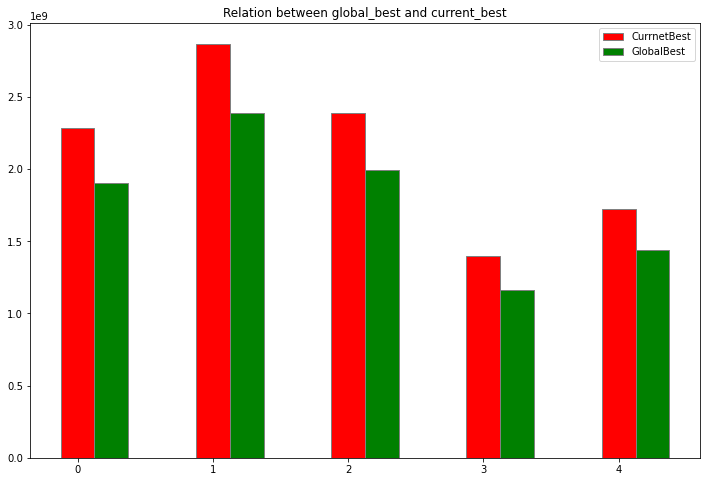

Total time taken was 0.9485335350036621 seconds


In [29]:
#MAIN OF PROGRAM
def main():
    st=time.time() #noting the Start time of program
    runs = 5
    iterations = 5
    currentBestCurves = np.zeros((runs, iterations))
    globalBestCurves = np.zeros((runs, iterations + 1))

    for run in range(runs):
        globalBestCurves[run],  currentBestCurves[run] = LOA() 
        
    et = time.time() #noting the End time of program
    
    xxx=[]
    for row in currentBestCurves:
        itr=0
        avg=0

        for col in row:
            itr= itr + 1
            avg= avg + col
        avg=avg/itr
        xxx.append(avg)
    yyy=[]
    for row in globalBestCurves:
        itr=0
        avg=0
        for col in row:
            itr= itr + 1
            if itr==1:
                continue
            avg= avg + col
        avg=avg/itr
        yyy.append(avg)

    # set width of bar
    barWidth = 0.25
    fig = plt.subplots(figsize =(12, 8))

    # Set position of bar on X axis
    br1 = np.arange(len(xxx))
    br2 = [x + barWidth for x in br1]

    # Make the plot
    plt.bar(br1, xxx, color ='r', width = barWidth, edgecolor ='grey', label ='CurrnetBest')
    plt.bar(br2, yyy, color ='g', width = barWidth, edgecolor ='grey', label ='GlobalBest')

    # Adding Xticks
    plt.title("Relation between global_best and current_best") 

    plt.legend()
    plt.show()
    print(f"Total time taken was {et-st} seconds")

E_t = []
counter = []
ttt=1
def LOA():
    # HERE YOU CAN SET THE PARAMETERS FOR THE WHOLE ALGORITHM
    pride_num = 4             # NUMBER OF PRIDES
    nomad_percentage = 0.2      # NOMANDS PERCENTAGE OUT OF TOTAL POPULATION
    roaming_percentage = 0.2
    mutation_prob = 0.2
    sex_rate = 0.8           # MEANING THIS WILL BE FEMALES AND REMAINING MALES
    mating_prob = 0.3
    migrate_rate = 0.4
    n_population = 50               #POPULATION SIZE
    UPPER_LIMIT = 100
    LOWER_LIMIT = -100
    dimensions = 30
    evaluation = SHC        #THIS IS THE F_1 SCORE ACCORDING TO THE CEF GUIDELINES
    #o sets the random rotation of the function as 80% are pride's lion so their are cuvered is also (-80 to 80)
    o = np.random.uniform(-80, 80, (1, dimensions))
    maximum_iterations = 5   #THIS IS BASCIALLY THE STOPING CONDITION OR RUNING ITERAITIONS
    global ttt
    
    #STEP 1 & 2
    prideArr, NomadLionArr = GENERATE_GROUPS(n_population, sex_rate, pride_num, nomad_percentage, UPPER_LIMIT, LOWER_LIMIT, dimensions, evaluation, o)
    global_best = [np.inf] #write now best is infinity
    track = []

    
    for it in range(maximum_iterations):
         
        start_time = time.time()
        prideArr, NomadLionArr = updateBestScoreList(prideArr, NomadLionArr)

        #STEP 3 & 4
        prideArr = HUNTING(prideArr, UPPER_LIMIT, LOWER_LIMIT)
        prideArr = move_to_safety(prideArr, UPPER_LIMIT, LOWER_LIMIT, dimensions)
        prideArr, NomadLionArr = lionsRoam(prideArr, NomadLionArr, roaming_percentage, UPPER_LIMIT, LOWER_LIMIT, dimensions)
        prideArr, NomadLionArr = lionsMating(prideArr, NomadLionArr, mating_prob, mutation_prob, LOWER_LIMIT, UPPER_LIMIT, o)
        prideArr, NomadLionArr = lionsAttackDefense(prideArr, NomadLionArr, sex_rate, n_population, nomad_percentage, pride_num)

        #STEP 5
        prideArr, NomadLionArr = MIGRATE_FEMALE_FROM_PRIDE(prideArr, NomadLionArr, migrate_rate, sex_rate, n_population, pride_num, nomad_percentage)

        #STEP 6
        prideArr, NomadLionArr = STEP6(prideArr, NomadLionArr, n_population, sex_rate, nomad_percentage, pride_num)

        #BEST SCORE OBTAINED SO FAR
        current_best = GET_CURRENT_BEST(prideArr, NomadLionArr)
        track.append(current_best)
        
        if current_best < global_best[-1]:
            global_best.append(current_best)
            print("IMPROVED SCORE: %.2E" % current_best)
        else:
            global_best.append(global_best[-1])
        
        if it == maximum_iterations-1:
            elapsed_time = (time.time() - start_time)
            fPer = (ttt/maximum_iterations)*100
            ttt= ttt+1
            print(f"Program Completion => {fPer}% Time taken for this run is {elapsed_time} seconds")
            E_t.append(elapsed_time) 
            #counter.append(it)
    return np.reshape(np.array(global_best), (len(global_best),)), np.reshape(np.array(track), (len(track)))

if __name__ == "__main__":
    main()

In [17]:
x = len(E_t)
for i in range(x):
    counter.append(i+1)

# 3 Small Inputs

Text(0.5, 0, 'Iterations')

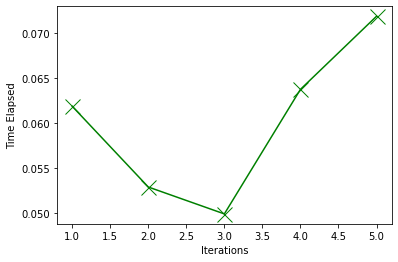

In [18]:
#5 RUNS AND ITERATIONS
plt.plot(counter, E_t ,color='green', markerfacecolor='blue', markersize=15, marker='x')
plt.ylabel("Time Elapsed")
plt.xlabel("Iterations")

Text(0.5, 0, 'Iterations')

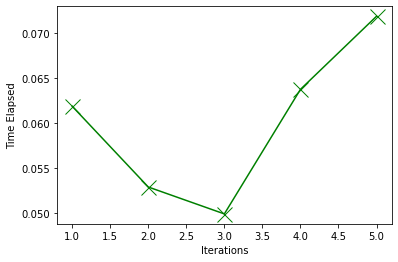

In [19]:
#6 RUNS AND ITERATIONS
plt.plot(counter, E_t ,color='green', markerfacecolor='blue', markersize=15, marker='x')
plt.ylabel("Time Elapsed")
plt.xlabel("Iterations")

Text(0.5, 0, 'Iterations')

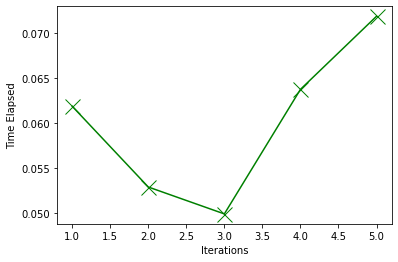

In [20]:
#7 RUNS AND ITERATIONS
plt.plot(counter, E_t ,color='green', markerfacecolor='blue', markersize=15, marker='x')
plt.ylabel("Time Elapsed")
plt.xlabel("Iterations")

# 5 Large Inputs

Text(0.5, 0, 'Iterations')

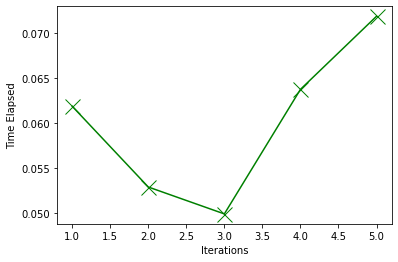

In [21]:
#10 RUNS AND ITERATIONS
plt.plot(counter, E_t ,color='green', markerfacecolor='blue', markersize=15, marker='x')
plt.ylabel("Time Elapsed")
plt.xlabel("Iterations")

Text(0.5, 0, 'Iterations')

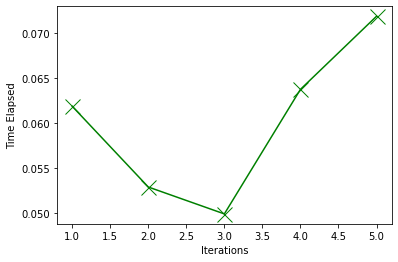

In [22]:
#12 RUNS AND ITERATIONS
plt.plot(counter, E_t ,color='green', markerfacecolor='blue', markersize=15, marker='x')
plt.ylabel("Time Elapsed")
plt.xlabel("Iterations")

Text(0.5, 0, 'Iterations')

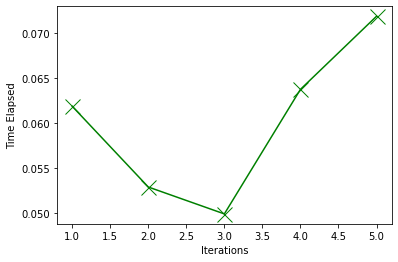

In [23]:
#15 RUNS AND ITERATIONS
plt.plot(counter, E_t ,color='green', markerfacecolor='blue', markersize=15, marker='x')
plt.ylabel("Time Elapsed")
plt.xlabel("Iterations")

Text(0.5, 0, 'Iterations')

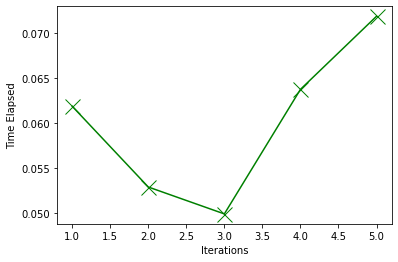

In [24]:
#17 RUNS AND ITERATIONS
plt.plot(counter, E_t ,color='green', markerfacecolor='blue', markersize=15, marker='x')
plt.ylabel("Time Elapsed")
plt.xlabel("Iterations")

Text(0.5, 0, 'Iterations')

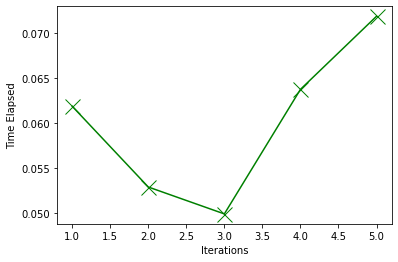

In [25]:
#20 RUNS AND ITERATIONS
plt.plot(counter, E_t ,color='green', markerfacecolor='blue', markersize=15, marker='x')
plt.ylabel("Time Elapsed")
plt.xlabel("Iterations")